Fra:1 Mem:16.03M (Peak 16.03M) | Time:00:00.00 | Syncing Light
Fra:1 Mem:16.03M (Peak 16.03M) | Time:00:00.00 | Syncing Camera
Fra:1 Mem:16.04M (Peak 16.04M) | Time:00:00.00 | Syncing Torus.001
Fra:1 Mem:17.38M (Peak 17.38M) | Time:00:00.00 | Rendering 1 / 64 samples
Fra:1 Mem:16.47M (Peak 17.38M) | Time:00:00.08 | Rendering 26 / 64 samples
Fra:1 Mem:16.47M (Peak 17.38M) | Time:00:00.14 | Rendering 51 / 64 samples
Fra:1 Mem:16.47M (Peak 17.38M) | Time:00:00.17 | Rendering 64 / 64 samples
Saved: 'test.png'
 Time: 00:00.18 (Saving: 00:00.00)



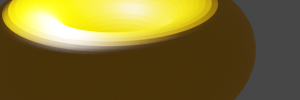

13:58:49 | ERROR: Draco mesh compression is not available because library could not be found at /Users/jan-hendrik/projects/ipyblender-experimental/further_ideas/Resources/3.6/python/lib/python3.10/site-packages/libextern_draco.dylib
13:58:49 | INFO: Starting glTF 2.0 export
13:58:49 | INFO: Extracting primitive: Torus.001
13:58:49 | INFO: Primitives created: 1
13:58:49 | INFO: Finished glTF 2.0 export in 0.04931521415710449 s



{'FINISHED'}

In [2]:
import bpy
from IPython.display import Image, display

# Ensure the glTF exporter is activated
bpy.ops.preferences.addon_enable(module='io_scene_gltf2')

# Delete all mesh objects from the scene
bpy.ops.object.select_all(action="DESELECT")
bpy.ops.object.select_by_type(type="MESH")
bpy.ops.object.delete()

# Add a torus
bpy.ops.mesh.primitive_torus_add(
    major_radius=1.5,
    minor_radius=0.75,
    major_segments=48 * 4,
    minor_segments=12 * 4,
    align="WORLD",
    location=(0, 1, 1),
)

# Assigning the torus to a variable
torus = bpy.context.active_object

# Create a new material and assign it to the torus
material = bpy.data.materials.new(name="OrangeMaterial")
torus.data.materials.append(material)
material.use_nodes = True
nodes = material.node_tree.nodes

# Clear default nodes
for node in nodes:
    nodes.remove(node)

# Add Shader nodes
bsdf = nodes.new(type="ShaderNodeBsdfPrincipled")
bsdf.location = (400, 0)
bsdf.inputs["Base Color"].default_value = (1, 0.5, 0, 1)  # Orange color

output = nodes.new(type="ShaderNodeOutputMaterial")
output.location = (600, 0)

# Connect the nodes
material.node_tree.links.new(bsdf.outputs["BSDF"], output.inputs["Surface"])

# Light
light = bpy.data.objects["Light"]
light.location = (0, 0, 2)  # Position the light

# Camera
camera = bpy.data.objects["Camera"]
camera.location = (5, -3, 4)
camera.data.dof.use_dof = True
camera.data.dof.focus_distance = 5
camera.data.dof.aperture_fstop = 4

# Render
path = "test.png"
bpy.context.scene.render.resolution_x = 300
bpy.context.scene.render.resolution_y = 100
bpy.context.scene.render.image_settings.file_format = "PNG"
bpy.context.scene.render.filepath = path
bpy.ops.render.render(write_still=True)
bpy.data.images["Render Result"].save_render(filepath=bpy.context.scene.render.filepath)

display(Image(path))

# Exporting the model to .glb format for Three.js
# Specify the path where you want to save the exported model
gltf_path = "./model_torus.gltf"

# Select only the torus object
bpy.ops.object.select_all(action='DESELECT')
torus.select_set(True)

# Export the selected torus object to a .glb file
bpy.ops.export_scene.gltf(filepath=gltf_path, export_format='GLTF_EMBEDDED', use_selection=True)
